# **Исследовательский анализ данных (EDA)**

### Введение
Целью данного проекта является предсказание прочности бетона на основе предоставленных данных. Для оценки модели будет использована метрика RMSE (Root Mean Squared Error), рассчитываемая по формуле:

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}$$

где:
- $ y_i $ — истинное значение целевой переменной,
- $ \hat{y}_i $ — предсказанное значение,
- $ N $ — количество наблюдений.

Мы будем использовать линейную регрессию, которая предполагает линейную зависимость целевой переменной от признаков. Она минимизирует сумму квадратов отклонений предсказанных значений от истинных.



# **Импорт библиотек и загрузка данных**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Загружаем данные
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


Matplotlib is building the font cache; this may take a moment.


### Описание данных

**Обучающий набор (`train.csv`)**:
- `Id` — уникальный идентификатор записи.
- Остальные столбцы — числовые признаки, влияющие на прочность бетона.
- `Strength` — целевая переменная (прочность бетона).

**Тестовый набор (`test.csv`)**:
- Идентичный набор признаков, за исключением отсутствия целевой переменной `Strength`.

**Формат предсказаний (`sample_submission.csv`)**:
- Два столбца: `Id` и `Strength`.


# **Общая информация о данных**

In [5]:
# Просмотр структуры данных
print("Размеры обучающего датасета:", train.shape)
print("Размеры тестового датасета:", test.shape)
print("Первые строки обучающего датасета:")
train.head()

Размеры обучающего датасета: (5407, 10)
Размеры тестового датасета: (3605, 9)
Первые строки обучающего датасета:


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [6]:
print("Информация о данных:")
train.info()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB


In [7]:
print("Статистика по данным:")
train.describe()

Статистика по данным:


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
# Проверка на пропуски
print("Пропущенные значения в обучающем наборе:")
print(train.isnull().sum())


Пропущенные значения в обучающем наборе:
id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64



### Анализ
Данные являются числовыми, пропуски отсутствуют. Это упрощает предварительную обработку.



# **Анализ целевой переменной**


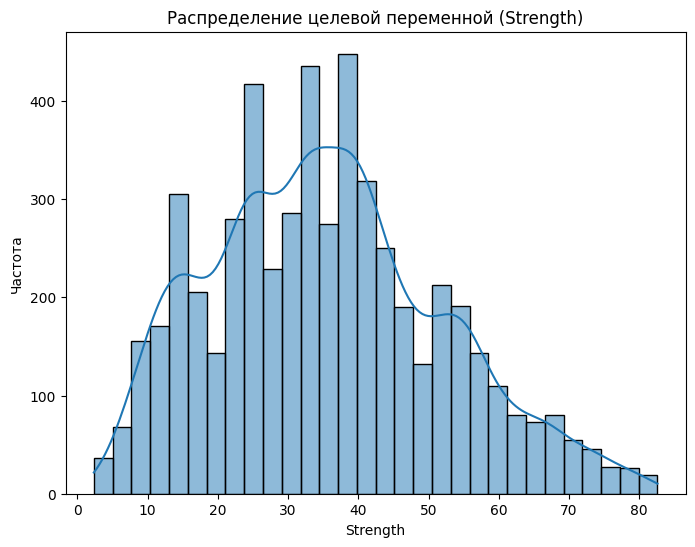

In [10]:
# Распределение целевой переменной
plt.figure(figsize=(8, 6))
sns.histplot(train['Strength'], kde=True, bins=30)
plt.title("Распределение целевой переменной (Strength)")
plt.xlabel("Strength")
plt.ylabel("Частота")
plt.show()


### Вывод
Целевая переменная имеет распределение, близкое к нормальному



# **Корреляционный анализ**

Корреляционная матрица позволяет выявить признаки, наиболее сильно связанные с целевой переменной.

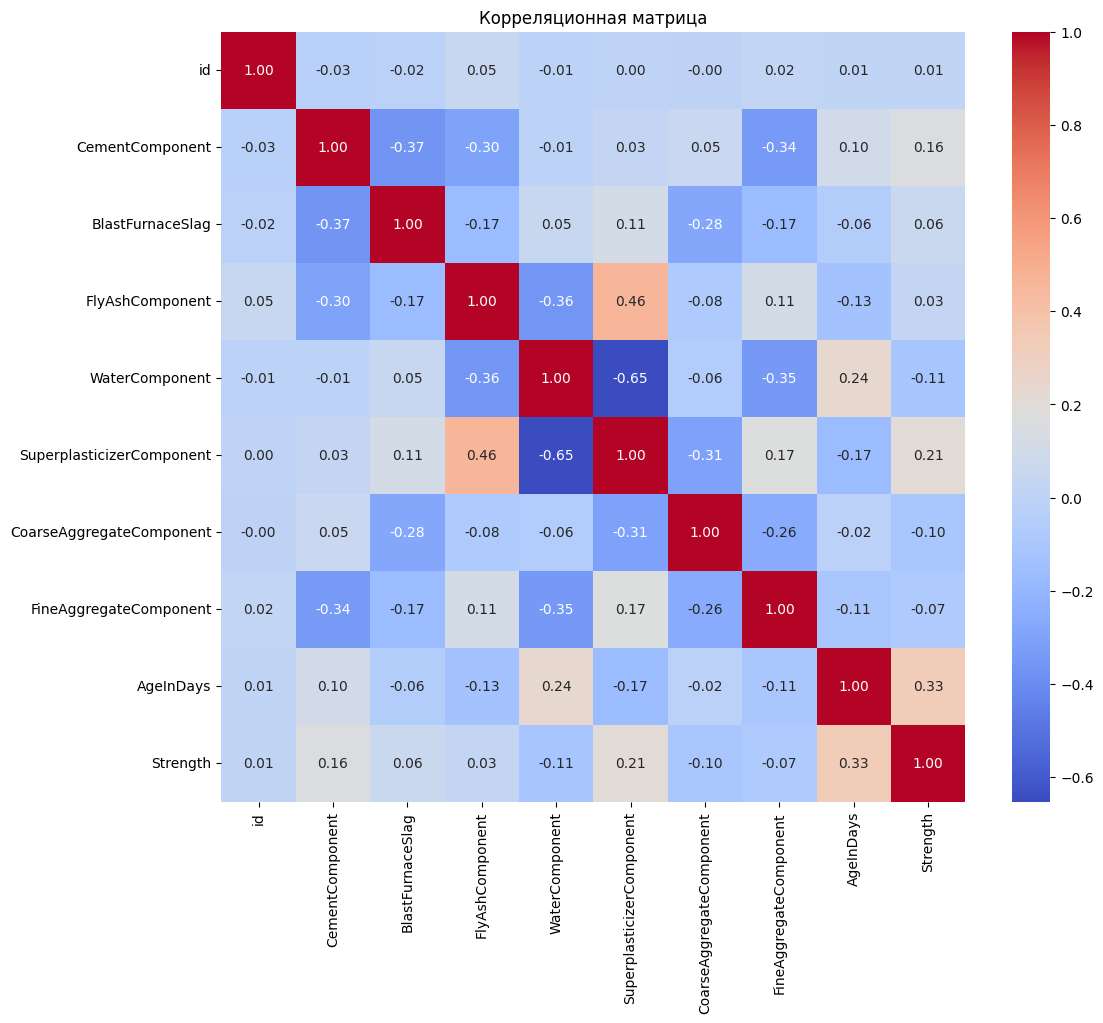

In [12]:
# Построение корреляционной матрицы
plt.figure(figsize=(12, 10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()



# **Предварительная обработка данных**


In [30]:
# Убираем ненужные столбцы (если такие есть)
X = train.drop(columns=['Strength', 'id'])
y = train['Strength']



# **Подбор гиперпараметров**


### Теория


Формула для линейной регрессии с Ridge (L2) регуляризацией:


$$ L(\beta) = \sum_{i=1}^N (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^p \beta_j^2 $$


### Объяснение:
- $ L(\beta) $ — функция потерь (обучающая ошибка + штраф за большие коэффициенты).
- $ y_i $ — истинное значение целевой переменной.
- $ X_i $ — вектор признаков для $i$-го объекта.
- $ \beta $ — вектор коэффициентов модели.
- $ \alpha $ — коэффициент регуляризации, который контролирует силу штрафа.
- $ p $ — количество признаков.

### Как это работает:
- Первая часть $(y_i - X_i \beta)^2$ минимизирует ошибку предсказания.
- Вторая часть $\alpha \sum_{j=1}^p \beta_j^2$ добавляет штраф за слишком большие значения коэффициентов $\beta_j$.
- Чем больше $\alpha$, тем сильнее штраф, что помогает избежать переобучения.

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error

In [34]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Подбор параметров для Ridge-регрессии
param_grid = {'alpha': [0.1, 1.0, 1e1, 1e2, 1e3, 1e4], 'fit_intercept': [True, False]}

grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5, 
    return_train_score=True
)

# Запуск поиска
grid_search.fit(X, y)

# Вывод результатов
print(f"Лучшие параметры: {grid_search.best_params_}")

Лучшие параметры: {'alpha': 1000.0, 'fit_intercept': True}


# **Оценка на тестовом наборе**

In [38]:
# Обучение финальной модели с лучшими параметрами на всех тренировочных данных
best_params = grid_search.best_params_  # Извлекаем лучшие параметры из GridSearchCV

# Создаём финальную модель с этими параметрами
final_model = Ridge(**best_params)

# Обучаем модель на всём тренировочном наборе
final_model.fit(X, y)

# Делаем предсказания на тестовом наборе
test_predictions = final_model.predict(test.drop(columns=['id']))

# Создание файла для сабмита
submission = pd.DataFrame({
    'id': test['id'],
    'Strength': test_predictions
})
submission.to_csv('submission.csv', index=False)

### Итог
После загрузки предсказаний на Kaggle, метрика RMSE у предсказанных значений оказалась равна 14.12635 на публичной части набора данных и 14.69168 на приватной части набора данных.
